# A simple example: Best plane to fit a set of points

In this example we find a plane that best fit the points

In [1]:
x_1=[0,0,1]
x_2=[1,0,2]
x_3=[0,1,2]
x_4=[1,1,4]

We would use linear regression for this, but we use Tensorflow

In [2]:
import tensorflow as tf
import numpy as np

We put the points together

In [3]:
X_data=np.array([[0,0],[1,0],[0,1],[1,1]])
y_data=np.array([[1],[2],[2],[3]])

we create our objects

In [4]:
X=tf.placeholder(shape=(4,2),dtype=tf.float32,name='input')
y=tf.placeholder(shape=(4,1),dtype=tf.float32,name='output')
W=tf.Variable([[1],[1]],dtype=tf.float32,name='weights')
b=tf.Variable([0],dtype=tf.float32,name='bias')

We then create the graph

In [5]:
line_approx=tf.matmul(X,W)+b

we can create a loss function for our approximation

In [6]:
loss=tf.reduce_sum(tf.square(line_approx-y,name='loss'))

Finally, we use gradient descent for optimizing, tensorflow is great for this

In [7]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

Now, nothing has run yet, we need to create a session and run it to see how thinks change

In [8]:
sess=tf.Session()

Variables need to be initialized

In [9]:
sess.run(tf.global_variables_initializer())

In [10]:
for i in range(2): # run 100 epochs
    sess.run(optimizer,feed_dict={X:X_data,y:y_data})
    print(sess.run(W))

[[ 1.00100005]
 [ 1.00100005]]
[[ 1.00199997]
 [ 1.00199997]]


as long as we don't close the session we can keep training.

In [11]:
for i in range(3): # run 100 epochs
    sess.run(optimizer,feed_dict={X:X_data,y:y_data})
    print(sess.run(W))

[[ 1.00299978]
 [ 1.00299978]]
[[ 1.00399947]
 [ 1.00399947]]
[[ 1.00499892]
 [ 1.00499892]]


In [12]:
Loss=[]
for i in range(10000): # run 100 epochs
    sess.run(optimizer,feed_dict={X:X_data,y:y_data})
    Loss+=[sess.run(loss,feed_dict={X:X_data,y:y_data})]

In [13]:
import matplotlib.pyplot as plt

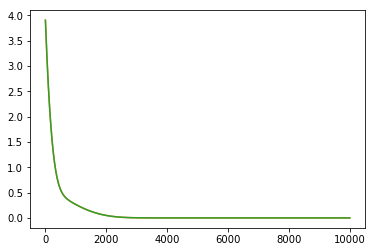

In [16]:
plt.plot(Loss)
plt.show()

** Exercise: ** Follow the instruction to use tensorboard to visualize the graph.

1. Create a new notebook.
2. Assign names to all the objects.
3. Use tf.name_score('Name_of_the_scope') to organize your graph
4. Use tf.summary.scalar(loss) to save the loss values at each step
5. You neet tf.sumary.merge_all()
6. Display your graph